In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("C:/Users/hp/Downloads/placement.csv")

In [64]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

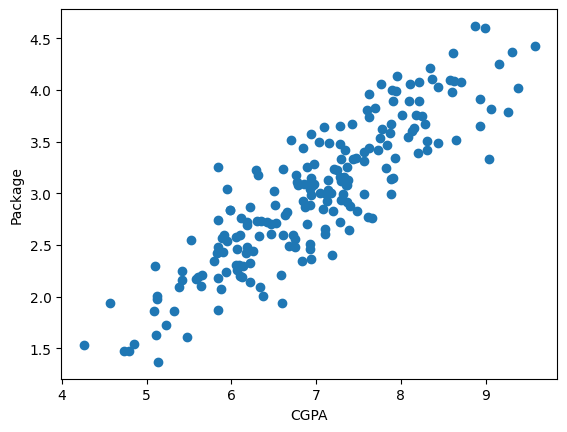

In [65]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [66]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [67]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [68]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [71]:
LR.fit(X_train,y_train)

LinearRegression()

In [72]:
X_test

,cgpa
198,7.63
103,7.05
95,6.63
182,5.88
113,6.94
32,6.96
27,5.42
108,7.76
133,6.05
140,7.91


In [73]:
y_test

198    3.96
103    3.00
95     2.79
182    2.08
113    2.37
32     3.08
27     2.16
108    3.54
133    2.58
140    3.15
65     3.81
177    3.64
188    3.08
180    2.72
63     4.25
157    2.70
137    3.13
104    3.74
191    3.48
50     4.43
112    4.10
42     2.54
174    2.99
31     3.89
150    2.73
154    2.85
98     3.83
85     1.48
57     1.94
93     3.08
97     2.84
88     1.48
189    4.06
90     2.66
107    2.59
55     3.39
197    3.24
68     2.99
167    3.60
20     3.16
Name: package, dtype: float64

In [74]:
y_pred=LR.predict(X_test)

In [75]:
y_pred

array([3.34604536, 3.02240668, 2.78804764, 2.36954935, 2.96102693,
       2.97218689, 2.11287039, 3.41858507, 2.46440896, 3.50228473,
       3.32930543, 3.04472659, 3.189806  , 2.54252864, 4.19978188,
       2.698768  , 3.07262648, 3.34046539, 3.15074616, 4.43414092,
       3.8761432 , 2.40860919, 3.17306607, 3.60830429, 2.60390839,
       3.03914662, 3.37952523, 1.76133183, 2.77130771, 2.87732728,
       2.42534912, 1.72785197, 3.61388427, 3.05588655, 2.62064832,
       3.66410407, 3.11168632, 3.30698552, 3.62504422, 3.15074616])

Text(0, 0.5, 'Package(in LPA)')

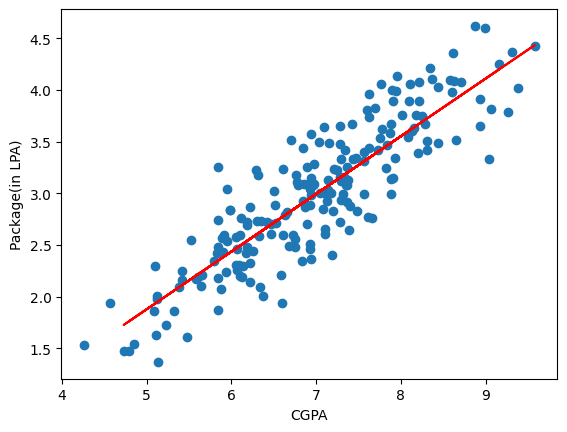

In [76]:
#Best Fit Line
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,y_pred,color="red")
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")

In [77]:
m=LR.coef_

In [78]:
m

array([0.55799772])

In [79]:
b=LR.intercept_

In [80]:
b

-0.9114772641561784

# Making Self Generated Algorithm

In [81]:
class MyLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train.iloc[i] - X_train.mean()) * (y_train.iloc[i] - y_train.mean()))
            den = den + ((X_train.iloc[i] - X_train.mean()) * (X_train.iloc[i] - X_train.mean()))

        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        print(X_test)
        
        return self.m * X_test + self.b

In [82]:
lr=MyLR()

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [84]:
lr.fit(X_train,y_train)

cgpa    0.551284
dtype: float64
cgpa   -0.859491
dtype: float64


In [85]:
print(lr.predict(X_test.iloc[0].values))

[6.06]
cgpa    2.481288
dtype: float64


# Regression Metrics

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
y_pred=LR.predict(X_test)

In [91]:
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))

Mean absolute error: 0.24892082669457816


In [92]:
print("Mean squared error:",mean_squared_error(y_test,y_pred))

Mean squared error: 0.09585734281904683


In [93]:
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.3096083700726562


In [95]:
print("R2 score:",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 score: 0.8277539418252787


In [97]:
#Adjusted R2 Score

In [98]:
X_test.shape

(40, 1)

In [100]:
print("Adjusted r2 score:",1-((1-r2)*(40-1)/(40-1-1)))

Adjusted r2 score: 0.8232211508206808


In [101]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.566025,3.26
1,5.12,0.439434,1.98
2,7.82,0.784646,3.25
3,7.42,0.736706,3.67
4,6.94,0.563716,3.57


Text(0, 0.5, 'Package(in lpa)')

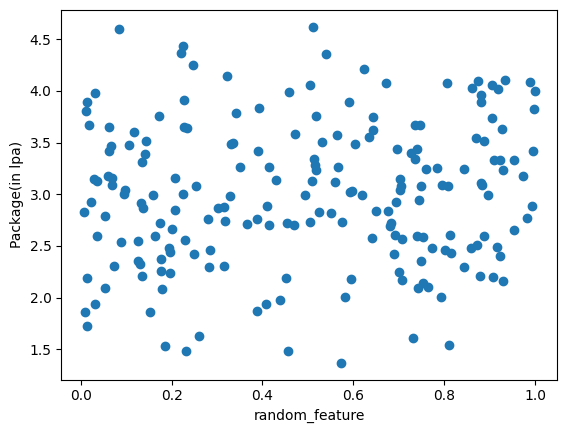

In [102]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [103]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [105]:
lr = LinearRegression()

In [106]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_test)

In [110]:
print("R2 score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score: 0.7781150889215781


In [111]:
print("Adjusted r2 score:",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted r2 score: 0.7661213099443661


In [112]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [113]:
new_df2.sample(5)

,cgpa,iq,package
163,8.93,3.51,3.91
177,7.09,4.64,3.64
110,8.18,4.86,3.76
83,8.44,3.39,3.49
46,6.07,1.36,2.26


Text(0, 0.5, 'Package(in lpa)')

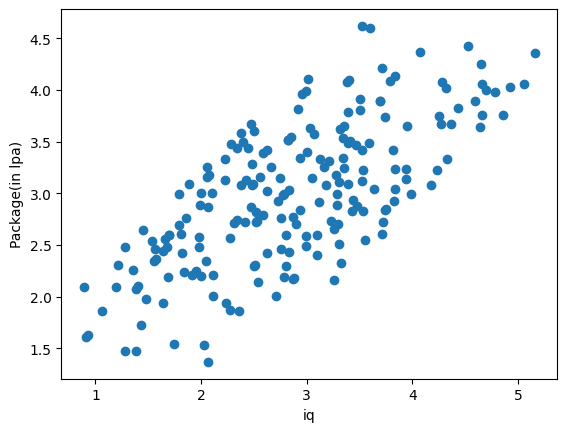

In [114]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [115]:
np.random.randint(-100,100)

52

In [116]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [119]:
print("R2 score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score: 0.8269273713827838


In [120]:
print("Adjusted r2 score:",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted r2 score: 0.8175720941602316
